### Bilinear capacity -- numerical (multiple S/P)

In [1]:
import sys
sys.path.insert(0, '../../../theory')
sys.path.insert(0, '../../../figures')
from capacity import capacity

In [2]:
import os
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.legend as mlegend
import plot_utils as pu

Load numerical data

In [3]:
directory = "data"
data_arr = []
def load_data(filepath):
    d = np.load(open(filepath, 'rb'), allow_pickle=True)
    return d.item()
for file in tqdm(os.listdir(directory)):
    if file.endswith(".npy"):
        filepath = os.path.join(directory, file)
        data_arr.append(load_data(filepath))
data = dict()
for d in data_arr:
    key1 = d['params']['S']
    key2 = d['params']['P']
    key3 = d['params']['N']
    data[tuple([key1, key2, key3])] = d
keys1 = sorted(np.unique([k[0] for k in data.keys()]))
keys2 = sorted(np.unique([k[1] for k in data.keys()]))
keys3 = sorted(np.unique([k[2] for k in data.keys()]))

100%|██████████| 66/66 [00:00<00:00, 287.29it/s]


Load mean-field data

In [9]:
directory = "../../article/3/data/"
filepath = "data_c.theta_0.22_sigma_0.10_P_%i_alpha_%i.npy"
mf_data = np.zeros((5,12))
P = [8,16,32,64,128]
for i, P in enumerate(P):
    for j in range(12):
        m, M, rbar = np.load(open(directory+filepath%(P,j),'rb'), allow_pickle=True)
        rho = m / np.sqrt(M-rbar**2)
        mf_data[i,j] = rho[-1,:].max()

In [15]:
P = [8,16,32,64,128]
mf_data_single = np.zeros(len(P))
mf_data_single[:] = np.NaN
for i, P in enumerate(P):
    try:
        m, M, rbar = np.load(directory+filepath%(P,12), allow_pickle=True)
        rho = m / np.sqrt(M-rbar**2)
        mf_data_single[i] = rho[-1,:].max()
    except:
        raise RuntimError("Could not load data file")

In [17]:
mf_data_extended = np.hstack([
    mf_data[:,:6],
    mf_data_single[:, np.newaxis],
    mf_data[:,6:]])

In [11]:
alpha_c = capacity(np.asarray([0.22]), np.asarray([0.1]))[0]

100%|██████████| 1/1 [00:00<00:00,  1.58it/s]


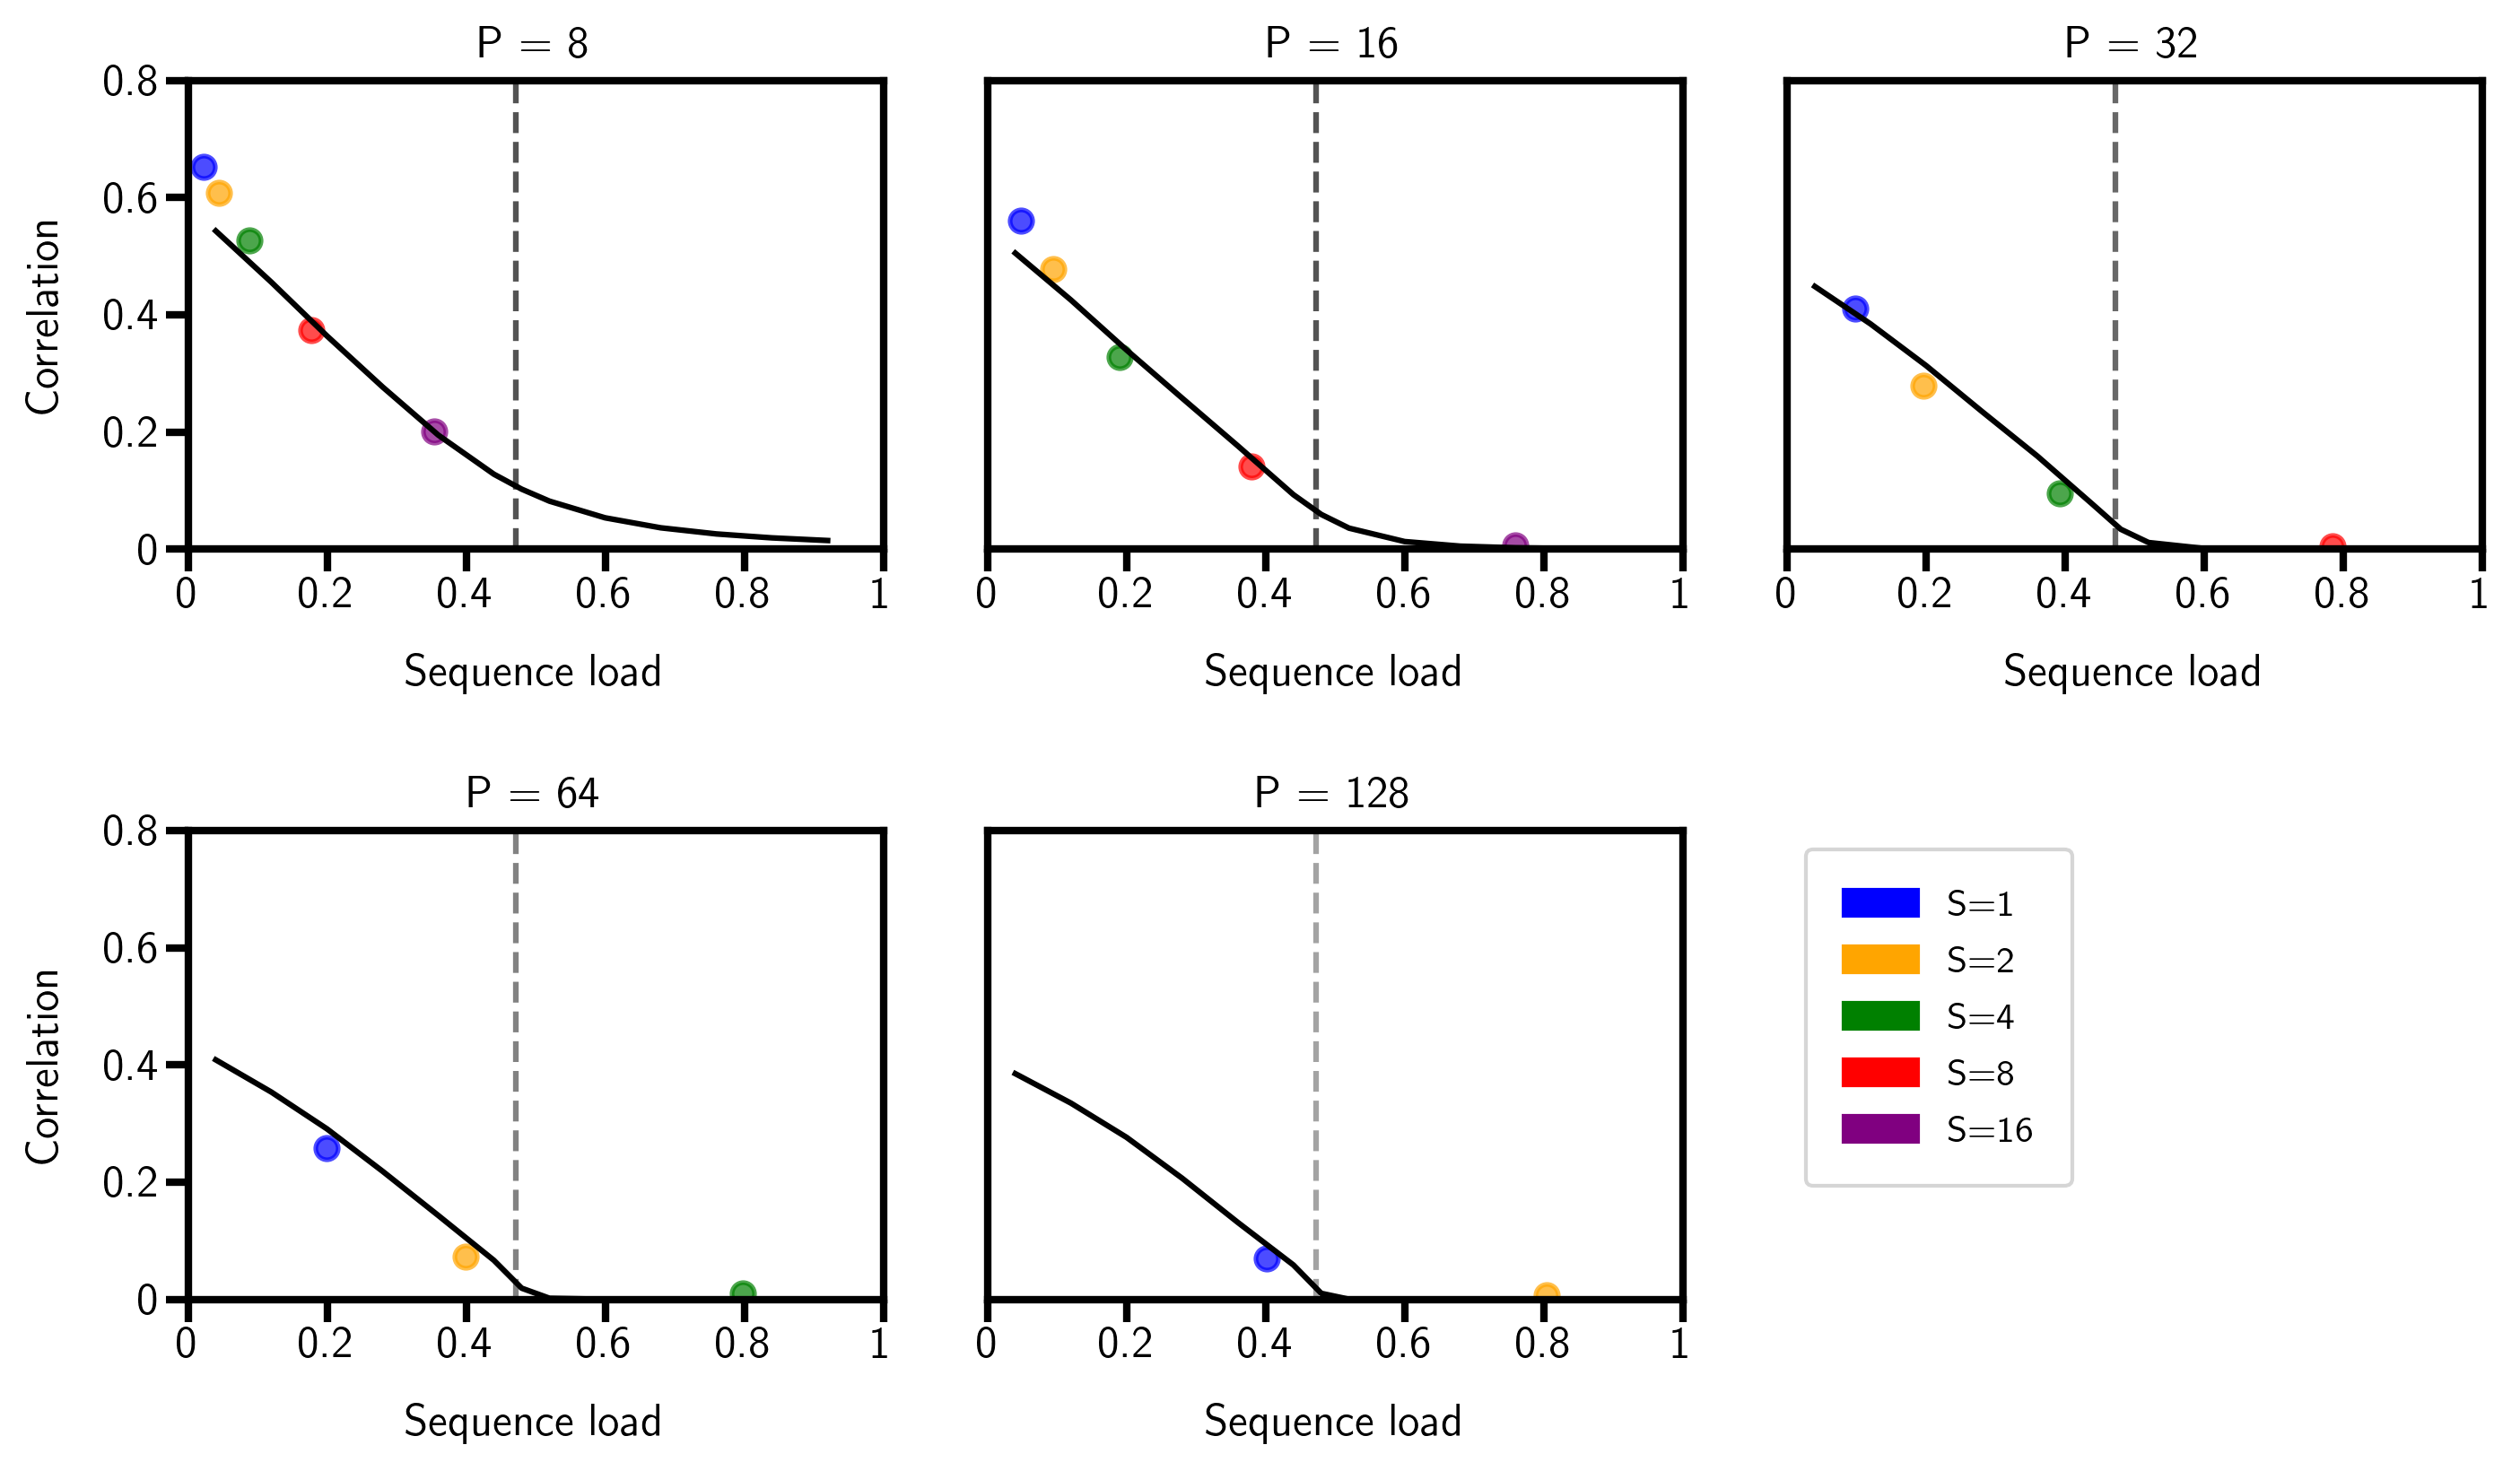

In [24]:
pu.figure_setup()
fig, ax = plt.subplots(2,3,figsize=(11,6))
ax = ax.flatten()
colors = {1: 'blue', 2: 'orange', 4: 'green', 8: 'red', 16: 'purple'}
edgecolors = {50000: 'none', 100000: 'black', 150000: 'purple'}
markersize = {50000: 25, 100000: 50, 150000: 75}

for n, P in enumerate([8,16,32,64,128]):
    for S in [1,2,4,8,16]:
        val = data.get((S,P,100000))
        if val is None:
            continue
        S = val['params']['S']
        P = val['params']['P']
        N = val['params']['N']
        if N not in [50000, 100000, 150000]:
            continue
        K = int(np.sqrt(N))
        ax[n].scatter(
            S*(P-1)/K,
            val['correlations'][-1].max(),
            color=colors[S],
            linewidths=1.25,
            alpha=0.7,
            label=S)
        ax[n].set_title("P = %i"%P, fontsize=12)
        ax[n].set_ylim([0,.8])
        ax[n].set_xlim([0,1])
        ax[n].set_xticks(np.arange(0,1.2,0.2))
        ax[n].set_xticklabels([("%.1f"%d).rstrip('0').rstrip('.')
                               for d in np.arange(0,1.2,0.2)])
        
        ax[n].axvline(alpha_c, linestyle='dashed', color='k', alpha=0.2)
    ax[n].plot(np.sort(np.r_[np.arange(1,25,2)*8/200., 0.48]), mf_data_extended[n], color='k');
    
for n in range(6):
    ax[n].set_xlabel("Sequence load", fontsize=12, labelpad=10);
for n in range(1,3):
    ax[n].set_yticks([])
for n in range(4,6):
    ax[n].set_yticks([])
for n in [0,3]:
    ax[n].set_yticks([0,0.2,0.4,0.6,0.8])
    ax[n].set_yticklabels([0,0.2,0.4,0.6,0.8])

ax[0].set_ylabel("Correlation", fontsize=12, labelpad=10);
ax[3].set_ylabel("Correlation", fontsize=12, labelpad=10);

for n in range(6):
    ax[n].tick_params(
        axis='both',
        which='major',
        labelsize=12,
        pad=1.5)
    ax[n].tick_params(direction='out', length=6, width=2)
    for dr in ['top','bottom','left','right']:
        ax[n].spines[dr].set_linewidth(2.0)
    
patches = []
for key, val in colors.items():
    patches.append(mpatches.Patch(color=val, label="S=%i"%key))
    
plt.subplots_adjust(wspace=0.15, hspace=0.60)
ax[-1].legend(handles=patches, ncol=1, loc=2, borderpad=1, fontsize=10);
ax[-1].axison = False
plt.savefig('../output/7.pdf', bbox_inches='tight')